In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The Data
---

We've got some data here. The data is a record of what the average number of friends for two groups ('East Coast' vs. 'West Coast'). There is also some other data about the members of the data set: Their education level.

The columns in question are: Coast | Degree | Members | Avg. # Friends

I purposefully made it a CSV so that we aren't tempted to 'study' the data just yet. Assume it's a gigantic amount of data where looking at it by hand would be infeasible.

In [2]:
df = pd.read_csv('coastal_friends.csv')

The Analysis
---

Now we're going to analyze the data.

We want to see which coast is the friendliest. What we want is a value for the avg. number of friends _for each coast_: West vs. East.

Now, because we paid attention in Data Science class, we know that we shouldn't use the naive mean for the number of friends. The East coast may not have an equal number of people with each degree, for example. So first we write a function that will computer the weighted average, where the weight is based on proportion of people with each degree.

The function is written in terms of some 'group', where we want that average for that group. So we take the `Members` column and use that as our weighting for the average:

In [3]:
def weighted_average(group):
    membs = group['Members']
    frnds = group['Avg. # Friends']
    return np.average(frnds, weights=membs)

The Insight?
---

Great, go us! We avoided a common mistake of just doing the naive average.

Now we perform our actual analysis: We want to group all the rows by which coast they are on. The function `groupby` does exactly this. We also have to tell Pandas _how_ to combine the values of the rows as we group them. For that we use our weighted average that we just defined.

We plot this to learn about which coast is friendliest.

<AxesSubplot:xlabel='Coast'>

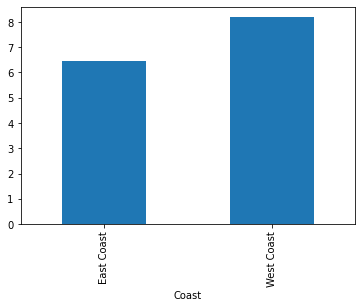

In [5]:
insight = df.groupby('Coast').apply(weighted_average)
insight.plot(kind='bar')

The Problem
---

The problem is that whenever you use some sort of summary statistic, like we did here with our weighted average, comparing summary statistics has an implicit assumption: That _all else_ is equal.

So when you read the plot above, you shouldn't read it as "West Coast folks have more friends on average". You should read it as "Assuming all else is equal, West Coast folks have more friends on average".

But what if all else _isn't_ equal? Then we might infer the wrong thing!

In [11]:
df

,Coast,Degree,Members,Avg. # Friends
0,East Coast,PhD,70,3.2
1,West Coast,PhD,35,3.1
2,East Coast,BS,33,13.4
3,West Coast,BS,66,10.9
